### Import dataset

In [1]:
import pandas as pd

In [2]:
PATH = "../Inference"
cyberlab = pd.read_csv(f"{PATH}/corpus_with_predictions.csv")
cyberlab.head(2)

,session_id,full_session,sensor,first_timestamp,Predicted_classes,Models_predictions
0,0,enable ; system ; shell ; sh ; cat /proc/mount...,eea5dc653b37,2019-06-04 09:45:11.151186+00:00,Discovery -- Discovery -- Discovery -- Discove...,Discovery -- Discovery -- Discovery -- Discove...
1,1,enable ; system ; shell ; sh ; cat /proc/mount...,eea5dc653b37,2019-06-04 09:45:50.396610+00:00,Discovery -- Discovery -- Discovery -- Discove...,Discovery -- Discovery -- Discovery -- Discove...


### How many unique sequences of predicted classes?

In [4]:
counter_fingerprints_cyberlab = cyberlab.value_counts("Models_predictions").reset_index().rename({0:"associated_sessions"}, axis = 1)
print(f"Number of unique model's predictions: {counter_fingerprints_cyberlab.shape[0]}")

Number of unique model's predictions: 1673
Number of unique model's predictions: 1259


### Obtain ECDF

In [5]:
import numpy as np
cdf_cyberlab = counter_fingerprints_cyberlab.value_counts("associated_sessions").sort_index()
cdf_cyberlab = np.cumsum(cdf_cyberlab)/np.sum(cdf_cyberlab)
cdf_cyberlab = cdf_cyberlab.reset_index(name = "cdf")

#### Now obtain inverse information: on the x_axis I the session ID; on the y_axis, the number of other sessions with the same prediction as the one I am considering

In [7]:
cyberlab = cyberlab.merge(counter_fingerprints_cyberlab, on = "Models_predictions").sort_values(by = "associated_sessions")

In [8]:
counter_sessions_per_fingerprints_cyberlab = cyberlab.groupby("associated_sessions")["full_session"].count().reset_index().rename({"associated_sessions": "|sessions in the same family|", "full_session":"occurrences"}, axis = 1)

In [9]:
counter_sessions_per_fingerprints_cyberlab["cdf_occurrences"] = 1 - np.cumsum(counter_sessions_per_fingerprints_cyberlab["occurrences"])/np.sum(counter_sessions_per_fingerprints_cyberlab["occurrences"])

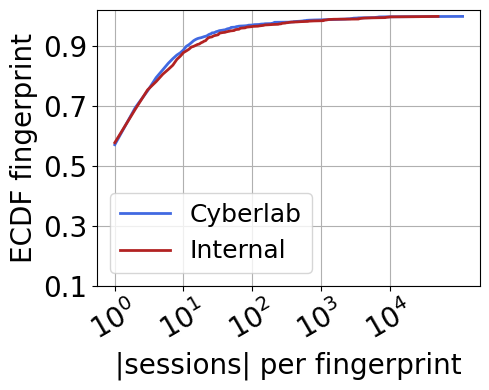

In [22]:
import matplotlib.pyplot as plt 

fig, (ax_1) = plt.subplots(1, figsize=(5,4))
fontsize = 20
ax_1.plot(cdf_cyberlab.associated_sessions, cdf_cyberlab.cdf, linewidth = 2, color = "royalblue", label = "Cyberlab")

ax_1.set_xlabel('|sessions| per fingerprint', fontsize = fontsize)
ax_1.set_xscale("log")
ax_1.set_ylabel('ECDF fingerprint', fontsize = fontsize)
ax_1.yaxis.set_tick_params(labelsize=fontsize)
ax_1.xaxis.set_tick_params(labelsize=fontsize, rotation = 30)
ax_1.set_xticks([1, 10, 100, 1000, 10000])
ax_1.set_yticks(np.arange(.1, 1.1, .2))
ax_1.legend(fontsize = fontsize - 2, loc = "lower left")
ax_1.grid()


plt.tight_layout()
plt.savefig("./Inference_results/sessions_per_fingerprint.pdf")

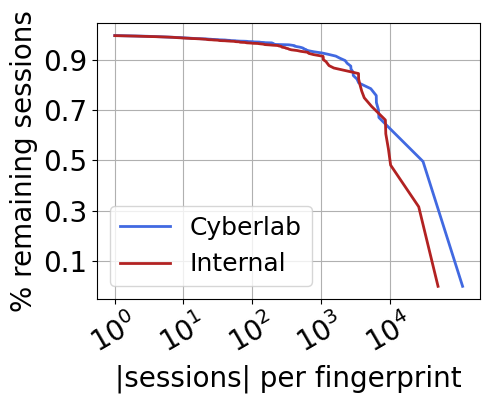

In [23]:
fig, (ax_2) = plt.subplots(1, figsize=(5,4))

ax_2.plot(counter_sessions_per_fingerprints_cyberlab["|sessions in the same family|"], counter_sessions_per_fingerprints_cyberlab["cdf_occurrences"], linewidth = 2, color = "royalblue", label = "Cyberlab")

ax_2.set_xlabel('|sessions| per fingerprint', fontsize = fontsize)
ax_2.set_xscale("log")
ax_2.set_ylabel('% remaining sessions', fontsize = fontsize)
ax_2.yaxis.set_tick_params(labelsize=fontsize)
ax_2.xaxis.set_tick_params(labelsize=fontsize, rotation = 30)
ax_2.set_xticks([1, 10, 100, 1000, 10000])
ax_2.set_yticks(np.arange(.1, 1.1, .2))
ax_2.legend(fontsize = fontsize - 2, loc = "lower left")

ax_2.grid()
plt.tight_layout()
plt.savefig("./Inference_results/remaining_corpus.pdf")